In [1]:
# Word Cloud Imports
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import nltk
import os
import sys
from collections import Counter
from nltk import word_tokenize
import VaderSentimentAnalysis

In [3]:
# needed for relative path import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Reading the CSV file containing all the reviews 

In [7]:
df = pd.read_csv('../output.csv')
df.head()

Review_Title Review_Method         Review_Date  \
0                   Great experience   via mobile     February 1, 2020   
1             Pleasantly surprised,    via mobile    December 30, 2019   
2         Bad staff, overpriced food   via mobile   September 26, 2019   
3  Lively atmosphere with great food   via website       July 24, 2019   
4                           Horrible   via website    February 9, 2019   

                                         Review_Text  
0  We were a large group, served quickly by very ...  
1  Pleasantly surprised, we were worried after re...  
2  Staff is unfriendly, unprofessional, inattenti...  
3  A friend took us to Cortijo and had a blast! T...  
4  DONT DO IT\nI called and reserved a spot at th...

## Getting general info about the data

In [5]:
df.columns

Index(['Review_Title', 'Review_Method', 'Review_Date', 'Review_Text'], dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Review_Title     24 non-null object
Review_Method    24 non-null object
Review_Date      24 non-null object
Review_Text      24 non-null object
dtypes: object(4)
memory usage: 896.0+ bytes


In [7]:
df.describe()

Review_Title Review_Method        Review_Date  \
count              41            41                 41   
unique             41             2                 41   
top     Not impressed   via mobile   September 8, 2010   
freq                1            22                  1   

                                              Review_Text  
count                                                  41  
unique                                                 41  
top     I decided to make reservation on monday via em...  
freq                                                    1

## Applying Vader Sentiment Analysis to the reviews

In [5]:
df[['vader_value','vader_output']] = df.apply(lambda row: VaderSentimentAnalysis.sentiment_scores(row['Review_Text']),axis=1)

Overall sentiment dictionary is :  {'neg': 0.184, 'neu': 0.488, 'pos': 0.328, 'compound': 0.7346}
sentence was rated as  18.4 % Negative
sentence was rated as  48.8 % Neutral
sentence was rated as  32.800000000000004 % Positive
sentence was rated as  73.46000000000001 % overall
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.184, 'neu': 0.488, 'pos': 0.328, 'compound': 0.7346}
sentence was rated as  18.4 % Negative
sentence was rated as  48.8 % Neutral
sentence was rated as  32.800000000000004 % Positive
sentence was rated as  73.46000000000001 % overall
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.241, 'neu': 0.677, 'pos': 0.081, 'compound': -0.9192}
sentence was rated as  24.099999999999998 % Negative
sentence was rated as  67.7 % Neutral
sentence was rated as  8.1 % Positive
sentence was rated as  -91.92 % overall
Sentence Overall Rated As Negative
Overall sentiment dictionary is :  {'neg': 0.049, 'neu': 0.658, 'pos'

Overall sentiment dictionary is :  {'neg': 0.026, 'neu': 0.706, 'pos': 0.268, 'compound': 0.9792}
sentence was rated as  2.6 % Negative
sentence was rated as  70.6 % Neutral
sentence was rated as  26.8 % Positive
sentence was rated as  97.92 % overall
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.8479}
sentence was rated as  0.0 % Negative
sentence was rated as  83.3 % Neutral
sentence was rated as  16.7 % Positive
sentence was rated as  84.78999999999999 % overall
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.9683}
sentence was rated as  0.0 % Negative
sentence was rated as  76.2 % Neutral
sentence was rated as  23.799999999999997 % Positive
sentence was rated as  96.83 % overall
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.03, 'neu': 0.775, 'pos': 0.196, 'compound': 0.9614}
sentence was rated a

In [6]:
df

Review_Title Review_Method  \
0                              Pleasantly surprised,    via mobile    
1                          Bad staff, overpriced food   via mobile    
2                   Lively atmosphere with great food   via website   
3                                            Horrible   via website   
4                                    Music and paella   via mobile    
5         A nice diversion from the mainstream joints   via website   
6                 At Least the Conversation Was Great   via mobile    
7                                    Unfriendly staff   via mobile    
8               Except musicians, nothing was spanaic   via website   
9                     Worst tapas We’ve  ever been to   via mobile    
10                                 Good food but loud   via mobile    
11                                   Good restaurant    via mobile    
12                                  Spanish dinner 🍴    via mobile    
13                                          Perfecto!   via website   
14                                     Interessting..   via mobile    
15                                  Amazing Birthday!   via website   
16                              Nice Spanish Ambiente   via mobile    
17        Nice Spanish restaurant and very nice staff   via mobile    
18  Dommage car des pointures du flamenco sont pas...   via website   
19                                           Must go!   via mobile    
20                                   Ver good tapas!!   via mobile    
21                                  Delicious tapas!    via mobile    
22          Great Spanish restaurant - to recommend!!   via mobile    
23                                    Flamenco dinner   via mobile    
24                                       Great place.   via mobile    
25                                       Lively place   via mobile    
26            Good food & live Flamenco dance/singing   via mobile    
27                                        Recommended   via mobile    
28  The worst birthday celebration ever, thanks to...   via website   
29                                        Salsa night   via mobile    
30                     Spanish dancing and Great Food   via website   
31     Go for the food, stay for the Flamenco dancing   via website   
32  Nice place and staff... note sure it came acro...   via website   
33                                       Very good...   via website   
34                            Excellent restaurant!!!   via website   
35                                      Not impressed   via website   
36       better paella then in barcelona and valencia   via website   
37                  Absolute Rubbish - Don'T Go There   via website   
38  Certainly the worst Spanish restaurant ever vi...   via website   
39                                                Bar   via website   
40  Energetic Atmosphere, Good Spansh food, Good S...   via website   

           Review_Date                                        Review_Text  \
0    December 30, 2019  Pleasantly surprised, we were worried after re...   
1   September 26, 2019  Staff is unfriendly, unprofessional, inattenti...   
2        July 24, 2019  A friend took us to Cortijo and had a blast! T...   
3     February 9, 2019  DONT DO IT\nI called and reserved a spot at th...   
4     January 29, 2019  Great tapas, great wines, great paella and gre...   
5     October 30, 2018  We went there based on reviews from friends. T...   
6     October 14, 2018  I was a little apprehensive about going to thi...   
7        June 16, 2018  I have been to this restaurant a couple of tim...   
8       April 30, 2018  Meat was old or was not cooked hygenically. Wa...   
9     November 1, 2017  To start design of the place is more German th...   
10    October 20, 2017  The service was prompt and the food selection ...   
11     August 29, 2017  Visited this restaurant as online said best Sp...   
12      August 2, 2017  We ordered warm tapas platter, pr

## Google NLP API for Entity & Sentiment analysis

In [7]:
from GoogleNLP import BasicSentimentAnalysis

#### Google NLP API Sentiment analysis

In [8]:
#Call the Google NLP sentiment analysis API
df[['NLPAPI_value','NLPAPI_magnitude','NLPAPI_output']] = df.apply(lambda row: BasicSentimentAnalysis.GoogleSentimentAnalysis(row['Review_Text']),axis=1)

../google_auth/credentials.json
Text: Pleasantly surprised, we were worried after reading the reviews. We were a large party, served quickly by very friendly staff and the food was good. No one had a bad meal.
Sentiment: 0.5, 2.200000047683716
positive feelng
../google_auth/credentials.json
Text: Pleasantly surprised, we were worried after reading the reviews. We were a large party, served quickly by very friendly staff and the food was good. No one had a bad meal.
Sentiment: 0.5, 2.200000047683716
positive feelng
../google_auth/credentials.json
Text: Staff is unfriendly, unprofessional, inattentive and even rude. Food is OK, but definitely overpriced. When we wanted to pay, the waiter said they do not accept cards. One would think there would be a sign that says “We accept only cash” at the entrance, but no. After we kept pushing and made the waiter realize we do not have cash, he agreed to accept the card. What kind of restaurant does not accept card payments? Maybe one that tries to

Text: Delicious Spanish dishes with many varieties. Very authentic Spanish ambiente with live Flamenco performance.
Sentiment: 0.8999999761581421, 1.899999976158142
positive feelng
../google_auth/credentials.json
Text: The food was very good and the people were very polite, speaking German, English, Greek, Spanish and Slovakian!
We had the mixed salad, Patatas bravas, Spanish sausage and for main the pork with fries.
They were all great and especially patatas bravas were very good in their garlic sauce.

The main dishes are slightly overpriced, but the rest were finely priced.

At night, there is live Spanish music and dances like flamengo, salsa, etc. I did not see the live show, but my friends told me that it is very good.

Would go back for sure and recommend it to travellers through Stuttgart.
Sentiment: 0.699999988079071, 5.199999809265137
positive feelng
../google_auth/credentials.json
Text: The food was just horrible such as the service.
The food is a minute prepared food from t

Text: Went on a date with my wife and after reading all the negative reviews i was IMPRESSED. We sat downstairs in the "cave" and enjoyed it all. The "cave" area is a bit small so expect to sit very close to your neighbors. We were greeted by the owner and escorted by the LIVE flamenco dancers. After finishing dinner we went to the bar and watched the entire show. Talk about impressive. For dinner we had the Paella, which was one of the best I have ever had--and yes i have been all over the world to eat Paella. I hope you give this place a shot.... it will be worth it.
Sentiment: 0.4000000059604645, 3.700000047683716
positive feelng
../google_auth/credentials.json
Text: The paella was tasteless and dull, the service was slow and uncommitted.

The only good thing I have to say about this restaurant, is that it wasn't disgusting in any way. And the alioli was good.

Still, I expect more from a restaurant than boring uninteresting food, and I will definitely not return to this one.
Sentim

In [9]:
df

Review_Title Review_Method  \
0                              Pleasantly surprised,    via mobile    
1                          Bad staff, overpriced food   via mobile    
2                   Lively atmosphere with great food   via website   
3                                            Horrible   via website   
4                                    Music and paella   via mobile    
5         A nice diversion from the mainstream joints   via website   
6                 At Least the Conversation Was Great   via mobile    
7                                    Unfriendly staff   via mobile    
8               Except musicians, nothing was spanaic   via website   
9                     Worst tapas We’ve  ever been to   via mobile    
10                                 Good food but loud   via mobile    
11                                   Good restaurant    via mobile    
12                                  Spanish dinner 🍴    via mobile    
13                                          Perfecto!   via website   
14                                     Interessting..   via mobile    
15                                  Amazing Birthday!   via website   
16                              Nice Spanish Ambiente   via mobile    
17        Nice Spanish restaurant and very nice staff   via mobile    
18  Dommage car des pointures du flamenco sont pas...   via website   
19                                           Must go!   via mobile    
20                                   Ver good tapas!!   via mobile    
21                                  Delicious tapas!    via mobile    
22          Great Spanish restaurant - to recommend!!   via mobile    
23                                    Flamenco dinner   via mobile    
24                                       Great place.   via mobile    
25                                       Lively place   via mobile    
26            Good food & live Flamenco dance/singing   via mobile    
27                                        Recommended   via mobile    
28  The worst birthday celebration ever, thanks to...   via website   
29                                        Salsa night   via mobile    
30                     Spanish dancing and Great Food   via website   
31     Go for the food, stay for the Flamenco dancing   via website   
32  Nice place and staff... note sure it came acro...   via website   
33                                       Very good...   via website   
34                            Excellent restaurant!!!   via website   
35                                      Not impressed   via website   
36       better paella then in barcelona and valencia   via website   
37                  Absolute Rubbish - Don'T Go There   via website   
38  Certainly the worst Spanish restaurant ever vi...   via website   
39                                                Bar   via website   
40  Energetic Atmosphere, Good Spansh food, Good S...   via website   

           Review_Date                                        Review_Text  \
0    December 30, 2019  Pleasantly surprised, we were worried after re...   
1   September 26, 2019  Staff is unfriendly, unprofessional, inattenti...   
2        July 24, 2019  A friend took us to Cortijo and had a blast! T...   
3     February 9, 2019  DONT DO IT\nI called and reserved a spot at th...   
4     January 29, 2019  Great tapas, great wines, great paella and gre...   
5     October 30, 2018  We went there based on reviews from friends. T...   
6     October 14, 2018  I was a little apprehensive about going to thi...   
7        June 16, 2018  I have been to this restaurant a couple of tim...   
8       April 30, 2018  Meat was old or was not cooked hygenically. Wa...   
9     November 1, 2017  To start design of the place is more German th...   
10    October 20, 2017  The service was prompt and the food selection ...   
11     August 29, 2017  Visited this restaurant as online said best Sp...   
12      August 2, 2017  We ordered warm tapas platter, pr

#### Slicing only negative reviews and converting the reviews to string to be used by the wordcloud

In [13]:
df_neg = df.loc[df['NLPAPI_output'] == 'Positive']
df_neg

Review_Title Review_Method  \
1                          Bad staff, overpriced food   via mobile    
3                                            Horrible   via website   
7                                    Unfriendly staff   via mobile    
8               Except musicians, nothing was spanaic   via website   
9                     Worst tapas We’ve  ever been to   via mobile    
28  The worst birthday celebration ever, thanks to...   via website   
35                                      Not impressed   via website   
38  Certainly the worst Spanish restaurant ever vi...   via website   

           Review_Date                                        Review_Text  \
1   September 26, 2019  Staff is unfriendly, unprofessional, inattenti...   
3     February 9, 2019  DONT DO IT\nI called and reserved a spot at th...   
7        June 16, 2018  I have been to this restaurant a couple of tim...   
8       April 30, 2018  Meat was old or was not cooked hygenically. Wa...   
9     November 1, 2017  To start design of the place is more German th...   
28   December 12, 2014  I decided to make reservation on monday via em...   
35        May 12, 2014  The paella was tasteless and dull, the service...   
38     August 31, 2012  Certainly the worst Spanish restaurant ever vi...   

    vader_value vader_output  NLPAPI_value  NLPAPI_magnitude NLPAPI_output  
1        -91.92     Negative          -0.5               4.1      negative  
3         53.48     Positive          -0.5               4.2      negative  
7        -83.16     Negative          -0.6               2.5      negative  
8        -31.82     Negative          -0.8               2.5      negative  
9         58.26     Positive          -0.6               6.1      negative  
28        84.24     Positive          -0.2               7.9      negative  
35        74.12     Positive          -0.4               3.1      negative  
38        65.97     Positive          -0.2               2.8      negative

In [14]:
negative_words = str()
tokenized_neg = []
df_neg.apply(lambda row: tokenized_neg.append(nltk.word_tokenize(row['Review_Text'])), axis=1)

1     None
3     None
7     None
8     None
9     None
28    None
35    None
38    None
dtype: object

In [15]:
for sentence in tokenized_neg:
       negative_words += " ".join(sentence)
negative_words

"Staff is unfriendly , unprofessional , inattentive and even rude . Food is OK , but definitely overpriced . When we wanted to pay , the waiter said they do not accept cards . One would think there would be a sign that says “ We accept only cash ” at the entrance , but no . After we kept pushing and made the waiter realize we do not have cash , he agreed to accept the card . What kind of restaurant does not accept card payments ? Maybe one that tries to avoid taxes .DONT DO IT I called and reserved a spot at the bar . I told the person on the phone I wanted to be able to see the show and she insisted that I would be able to ... we could n't see anything but the ladies midsection.. the aura was nice so we got over that . We ordered our food after 10 min of arriving ... after 30 min of waiting we asked what was taking so long on the food and the waiter said it will be another 5 min ... another 30 min go by and we just wanted to get the check and head to McDonalds ( WE WERE STARVING ) … r

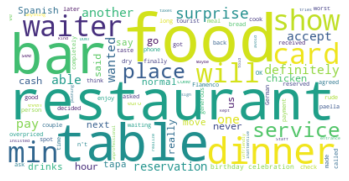

In [16]:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="white", max_words=100).generate(negative_words)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Applying Entity & Sentiment analysis using Goolge NLP API

In [10]:
from GoogleNLP import NLPAPI

../google_auth/credentials.json


In [12]:
df[['ent_n','ent_sa','ent_sc','ent_ma']] = df.apply(lambda row: NLPAPI.sample_analyze_entity_sentiment(row['Review_Text']),axis=1)

Representative name for the entity: party
Entity type: ORGANIZATION
Salience score: 0.49789541959762573
Entity sentiment score: 0.30000001192092896
Entity sentiment magnitude: 1.2000000476837158
Mention text: party
Mention type: COMMON
Representative name for the entity: reviews
Entity type: WORK_OF_ART
Salience score: 0.29493778944015503
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
Mention text: reviews
Mention type: COMMON
Representative name for the entity: staff
Entity type: PERSON
Salience score: 0.0758524090051651
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: staff
Mention type: COMMON
Representative name for the entity: No one
Entity type: PERSON
Salience score: 0.062266964465379715
Entity sentiment score: -0.800000011920929
Entity sentiment magnitude: 0.800000011920929
Mention text: No one
Mention type: COMMON
Representative name for the entity: meal
Entity type: OTHER
Salience score: 0.04026910290122032
E

Representative name for the entity: IT
Entity type: OTHER
Salience score: 0.1752309501171112
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
Mention text: IT
Mention type: COMMON
Representative name for the entity: spot
Entity type: OTHER
Salience score: 0.1398700326681137
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
Mention text: spot
Mention type: COMMON
Representative name for the entity: bar
Entity type: LOCATION
Salience score: 0.1398700326681137
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
Mention text: bar
Mention type: COMMON
Representative name for the entity: person
Entity type: PERSON
Salience score: 0.10686296969652176
Entity sentiment score: -0.20000000298023224
Entity sentiment magnitude: 0.699999988079071
Mention text: person
Mention type: COMMON
Representative name for the entity: phone
Entity type: CONSUMER_GOOD
Salience score: 0.0682184025645256
Entity sentiment score: 0.10000000149011612
Entity sentiment magnitude: 0.10000000

Representative name for the entity: some
Entity type: OTHER
Salience score: 0.24329227209091187
Entity sentiment score: -0.20000000298023224
Entity sentiment magnitude: 0.20000000298023224
Mention text: some
Mention type: COMMON
Representative name for the entity: reviews
Entity type: WORK_OF_ART
Salience score: 0.24329227209091187
Entity sentiment score: -0.10000000149011612
Entity sentiment magnitude: 0.10000000149011612
Mention text: reviews
Mention type: COMMON
Representative name for the entity: place
Entity type: LOCATION
Salience score: 0.19756372272968292
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
Mention text: place
Mention type: COMMON
Representative name for the entity: tapas
Entity type: OTHER
Salience score: 0.0295970868319273
Entity sentiment score: 0.10000000149011612
Entity sentiment magnitude: 0.10000000149011612
Mention text: tapas
Mention type: COMMON
Representative name for the entity: reviews
Entity type: WORK_OF_ART
Salience score: 0.0291429366916

Representative name for the entity: service
Entity type: OTHER
Salience score: 0.21347597241401672
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: service
Mention type: COMMON
Representative name for the entity: food selection
Entity type: OTHER
Salience score: 0.1901654452085495
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: food selection
Mention type: COMMON
Representative name for the entity: iterations
Entity type: OTHER
Salience score: 0.15428875386714935
Entity sentiment score: 0.30000001192092896
Entity sentiment magnitude: 0.800000011920929
Mention text: iterations
Mention type: COMMON
Representative name for the entity: taste
Entity type: OTHER
Salience score: 0.10591074824333191
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: taste
Mention type: COMMON
Representative name for the entity: people
Entity type: P

Representative name for the entity: tapas platter
Entity type: OTHER
Salience score: 0.26433447003364563
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: tapas platter
Mention type: COMMON
Representative name for the entity: prawns
Entity type: OTHER
Salience score: 0.26433447003364563
Entity sentiment score: 0.5
Entity sentiment magnitude: 0.5
Mention text: prawns
Mention type: COMMON
Representative name for the entity: cuttlefish
Entity type: OTHER
Salience score: 0.18519170582294464
Entity sentiment score: 0.20000000298023224
Entity sentiment magnitude: 0.20000000298023224
Mention text: cuttlefish
Mention type: COMMON
Representative name for the entity: garlic oil
Entity type: CONSUMER_GOOD
Salience score: 0.18305161595344543
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
Mention text: garlic oil
Mention type: COMMON
Representative name for the entity: Foods
Entity type: OTHER
Salience score: 0.10308771580457687
Ent

Representative name for the entity: dishes
Entity type: OTHER
Salience score: 0.49054253101348877
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: dishes
Mention type: COMMON
Representative name for the entity: Spanish
Entity type: LOCATION
Salience score: 0.21013043820858002
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
wikipedia_url = https://en.wikipedia.org/wiki/Spanish_language
mid = /m/06nm1
Mention text: Spanish
Mention type: PROPER
Mention text: Spanish
Mention type: PROPER
Representative name for the entity: varieties
Entity type: OTHER
Salience score: 0.14816178381443024
Entity sentiment score: 0.5
Entity sentiment magnitude: 0.5
Mention text: varieties
Mention type: COMMON
Representative name for the entity: ambiente
Entity type: OTHER
Salience score: 0.06836745142936707
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: ambiente
Mention type: COMMON
Repr

Representative name for the entity: spot
Entity type: OTHER
Salience score: 0.2002193182706833
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: spot
Mention type: COMMON
Representative name for the entity: Cortijo
Entity type: PERSON
Salience score: 0.16994795203208923
Entity sentiment score: 0.5
Entity sentiment magnitude: 1.100000023841858
wikipedia_url = https://en.wikipedia.org/wiki/Cortijo
mid = /g/1z44z5184
Mention text: Cortijo
Mention type: PROPER
Mention text: Cortijo
Mention type: PROPER
Representative name for the entity: entertainment
Entity type: OTHER
Salience score: 0.10876694321632385
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.20000000298023224
Mention text: entertainment
Mention type: COMMON
Mention text: show
Mention type: COMMON
Representative name for the entity: Stuttgart
Entity type: LOCATION
Salience score: 0.09635457396507263
Entity sentiment score: 0.10000000149011612
Entity sentiment magnitu

Representative name for the entity: restaurant
Entity type: LOCATION
Salience score: 0.38596081733703613
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: restaurant
Mention type: COMMON
Representative name for the entity: music
Entity type: WORK_OF_ART
Salience score: 0.1616734117269516
Entity sentiment score: 0.800000011920929
Entity sentiment magnitude: 0.800000011920929
Mention text: music
Mention type: COMMON
Representative name for the entity: spanish movement
Entity type: OTHER
Salience score: 0.11139652878046036
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
Mention text: spanish movement
Mention type: COMMON
Representative name for the entity: spanish
Entity type: LOCATION
Salience score: 0.09814824163913727
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
wikipedia_url = https://en.wikipedia.org/wiki/Spanish_language
mid = /m/06nm1
Mention text: spanish
Mention type: PROPER
Representative name for t

Representative name for the entity: restaurant
Entity type: LOCATION
Salience score: 0.22833052277565002
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: restaurant
Mention type: COMMON
Representative name for the entity: staff
Entity type: PERSON
Salience score: 0.22833052277565002
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: staff
Mention type: COMMON
Representative name for the entity: Spanish
Entity type: LOCATION
Salience score: 0.14083018898963928
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
wikipedia_url = https://en.wikipedia.org/wiki/Spanish_language
mid = /m/06nm1
Mention text: Spanish
Mention type: PROPER
Representative name for the entity: food
Entity type: OTHER
Salience score: 0.09221110492944717
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: food
Mention type: COMMON
Representative name f

Representative name for the entity: band performance
Entity type: OTHER
Salience score: 0.38337260484695435
Entity sentiment score: 0.6000000238418579
Entity sentiment magnitude: 1.2000000476837158
Mention text: band performance
Mention type: COMMON
Mention text: didnt
Mention type: COMMON
Representative name for the entity: place
Entity type: OTHER
Salience score: 0.19511079788208008
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: place
Mention type: COMMON
Representative name for the entity: food
Entity type: OTHER
Salience score: 0.12860605120658875
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: food
Mention type: COMMON
Representative name for the entity: ambience
Entity type: OTHER
Salience score: 0.07411526888608932
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: ambience
Mention type: COMMON
Representative name f

Representative name for the entity: Two
Entity type: PERSON
Salience score: 0.34125199913978577
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0
Mention text: Two
Mention type: COMMON
Representative name for the entity: food
Entity type: OTHER
Salience score: 0.17480462789535522
Entity sentiment score: 0.699999988079071
Entity sentiment magnitude: 1.5
Mention text: food
Mention type: COMMON
Representative name for the entity: restaurants
Entity type: LOCATION
Salience score: 0.14273609220981598
Entity sentiment score: 0.30000001192092896
Entity sentiment magnitude: 0.30000001192092896
Mention text: restaurants
Mention type: COMMON
Representative name for the entity: selection
Entity type: OTHER
Salience score: 0.12618152797222137
Entity sentiment score: 0.30000001192092896
Entity sentiment magnitude: 0.30000001192092896
Mention text: selection
Mention type: COMMON
Representative name for the entity: area
Entity type: LOCATION
Salience score: 0.08641660213470459
Entity sentim

Representative name for the entity: paella
Entity type: OTHER
Salience score: 0.320705384016037
Entity sentiment score: -0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: paella
Mention type: COMMON
Representative name for the entity: service
Entity type: OTHER
Salience score: 0.320705384016037
Entity sentiment score: -0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421
Mention text: service
Mention type: COMMON
Representative name for the entity: thing
Entity type: OTHER
Salience score: 0.17479830980300903
Entity sentiment score: 0.699999988079071
Entity sentiment magnitude: 1.5
Mention text: thing
Mention type: COMMON
Representative name for the entity: restaurant
Entity type: LOCATION
Salience score: 0.045370910316705704
Entity sentiment score: 0.20000000298023224
Entity sentiment magnitude: 0.20000000298023224
Mention text: restaurant
Mention type: COMMON
Representative name for the entity: alioli
Entity type: OTHER
Salience score: 0.0417

Representative name for the entity: girl
Entity type: PERSON
Salience score: 0.2538788616657257
Entity sentiment score: -0.10000000149011612
Entity sentiment magnitude: 1.100000023841858
Mention text: girl
Mention type: COMMON
Representative name for the entity: restaurant
Entity type: LOCATION
Salience score: 0.2426796704530716
Entity sentiment score: -0.20000000298023224
Entity sentiment magnitude: 0.20000000298023224
Mention text: restaurant
Mention type: COMMON
Representative name for the entity: restaurant
Entity type: LOCATION
Salience score: 0.2086019515991211
Entity sentiment score: -0.20000000298023224
Entity sentiment magnitude: 0.4000000059604645
Mention text: restaurant
Mention type: COMMON
Representative name for the entity: flamenco
Entity type: OTHER
Salience score: 0.06677785515785217
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 1.899999976158142
Mention text: flamenco
Mention type: COMMON
Mention text: place
Mention type: COMMON
Representative

In [13]:
df

Review_Title Review_Method  \
0                              Pleasantly surprised,    via mobile    
1                          Bad staff, overpriced food   via mobile    
2                   Lively atmosphere with great food   via website   
3                                            Horrible   via website   
4                                    Music and paella   via mobile    
5         A nice diversion from the mainstream joints   via website   
6                 At Least the Conversation Was Great   via mobile    
7                                    Unfriendly staff   via mobile    
8               Except musicians, nothing was spanaic   via website   
9                     Worst tapas We’ve  ever been to   via mobile    
10                                 Good food but loud   via mobile    
11                                   Good restaurant    via mobile    
12                                  Spanish dinner 🍴    via mobile    
13                                          Perfecto!   via website   
14                                     Interessting..   via mobile    
15                                  Amazing Birthday!   via website   
16                              Nice Spanish Ambiente   via mobile    
17        Nice Spanish restaurant and very nice staff   via mobile    
18  Dommage car des pointures du flamenco sont pas...   via website   
19                                           Must go!   via mobile    
20                                   Ver good tapas!!   via mobile    
21                                  Delicious tapas!    via mobile    
22          Great Spanish restaurant - to recommend!!   via mobile    
23                                    Flamenco dinner   via mobile    
24                                       Great place.   via mobile    
25                                       Lively place   via mobile    
26            Good food & live Flamenco dance/singing   via mobile    
27                                        Recommended   via mobile    
28  The worst birthday celebration ever, thanks to...   via website   
29                                        Salsa night   via mobile    
30                     Spanish dancing and Great Food   via website   
31     Go for the food, stay for the Flamenco dancing   via website   
32  Nice place and staff... note sure it came acro...   via website   
33                                       Very good...   via website   
34                            Excellent restaurant!!!   via website   
35                                      Not impressed   via website   
36       better paella then in barcelona and valencia   via website   
37                  Absolute Rubbish - Don'T Go There   via website   
38  Certainly the worst Spanish restaurant ever vi...   via website   
39                                                Bar   via website   
40  Energetic Atmosphere, Good Spansh food, Good S...   via website   

           Review_Date                                        Review_Text  \
0    December 30, 2019  Pleasantly surprised, we were worried after re...   
1   September 26, 2019  Staff is unfriendly, unprofessional, inattenti...   
2        July 24, 2019  A friend took us to Cortijo and had a blast! T...   
3     February 9, 2019  DONT DO IT\nI called and reserved a spot at th...   
4     January 29, 2019  Great tapas, great wines, great paella and gre...   
5     October 30, 2018  We went there based on reviews from friends. T...   
6     October 14, 2018  I was a little apprehensive about going to thi...   
7        June 16, 2018  I have been to this restaurant a couple of tim...   
8       April 30, 2018  Meat was old or was not cooked hygenically. Wa...   
9     November 1, 2017  To start design of the place is more German th...   
10    October 20, 2017  The service was prompt and the food selection ...   
11     August 29, 2017  Visited this restaurant as online said best Sp...   
12      August 2, 2017  We ordered warm tapas platter, pr

In [14]:
ent_n = []
ent_sc = []
def populate_entities(row):
    ent_n.append(row['ent_n'])
    ent_sc.append(row['ent_sc'])

In [15]:
df.apply(lambda row : populate_entities(row), axis=1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
dtype: object

In [37]:
ent_n

[['pizza',
  'pizza',
  'pasta',
  'meat',
  'fish',
  'Service',
  'salmon pizza',
  'veggie pizza',
  'reservations',
  'Both'],
 ['reviews', 'pizza dough', 'charts', 'supermarket stuff', 'ingredients'],
 ['pizzas',
  'people',
  'pizzas',
  'ingredients',
  'staff',
  'restaurant',
  'family run',
  'Stuttgart',
  'Germany'],
 ['recommendation',
  'pizza',
  'stay',
  'hommage',
  "L'arista",
  'Napoli',
  'dinner',
  'service',
  'people',
  'R'],
 ['Everything', 'look', 'Pizza', 'bruchetta', 'pizza funghi', 'mushroom'],
 ['waitress',
  'table',
  'table',
  'order',
  'food',
  'wine',
  'time',
  'table',
  'table',
  'order',
  'owner cam',
  'desert',
  'son',
  'mother',
  'couple',
  'German',
  'problem',
  'table'],
 ['pizza', 'stuttgart', 'mozzarella', 'tomato souce'],
 ['pizza',
  'mai mangiata',
  'Congratulations',
  'assolutamente da provare se siete'],
 ['pizza',
  'Neapolitan',
  'Stuttgart',
  'airport',
  'taste',
  'something',
  'area',
  'staff',
  'war',
  'Dan

In [38]:
ent_sc

[[0.800000011920929,
  -0.10000000149011612,
  -0.699999988079071,
  -0.6000000238418579,
  -0.5,
  0.8999999761581421,
  0.10000000149011612,
  0.0,
  0.0,
  0.8999999761581421],
 [0.6000000238418579,
  -0.699999988079071,
  -0.5,
  -0.4000000059604645,
  -0.4000000059604645],
 [0.8999999761581421,
  0.10000000149011612,
  0.8999999761581421,
  0.8999999761581421,
  0.8999999761581421,
  0.0,
  0.10000000149011612,
  0.0,
  0.0],
 [0.8999999761581421,
  0.8999999761581421,
  0.0,
  0.6000000238418579,
  0.20000000298023224,
  0.0,
  -0.10000000149011612,
  0.8999999761581421,
  0.8999999761581421,
  0.0],
 [0.8999999761581421,
  0.10000000149011612,
  -0.8999999761581421,
  0.0,
  0.0,
  -0.699999988079071],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.30000001192092896,
  0.30000001192092896,
  -0.30000001192092896,
  0.0,
  0.0,
  0.0,
  -0.10000000149011612,
  0.0,
  -0.20000000298023224,
  -0.4000000059604645,
  -0.30000001192092896,
  0.0,
  -0.4000000059604645,
  0.10000000149011612],
 [0.89

In [16]:
#### separating negative & positive entities and converting the reviews to string to be used by the wordcloud
flat_ent_sc = [item for sublist in ent_sc for item in sublist]
flat_ent_n = [item for sublist in ent_n for item in sublist]
positive_entities = [x for x, y in zip(flat_ent_n, flat_ent_sc) if y > 0]
negative_entities = [x for x, y in zip(flat_ent_n, flat_ent_sc) if y < 0]
positive_entities_string = ' '.join(positive_entities)
negative_entities_string = ' '.join(negative_entities)

In [ ]:
positive_entities

In [ ]:
negative_entities

## creating cloud word for positive entities

In [17]:
positive_entities_string

'party staff food waiter friend blast food staff music show table food some problems phone aura show tapas wines paella music highlight dishes travelers something tapas tapas beer best show gut feeling entertainment guitarist bread design tapas bars service food selection iterations taste show cousins conversation weather permits restaurant restaurant paella go cos Stuttgart paella paella version best paella perfection thing lot Alioli food tapas platter prawns cuttlefish Foods One places wednesdays Stuttgart second Stuggi Cortijo service ambient business music Personnel space restaurant best friends birthday reservation vase flowers wine Drink blanco Music Everything everybody dancing friends fun opinion lot Tapas birthday one dishes varieties ambiente performance Flamenco food people patatas bravas garlic sauce sausage rest music flamengo dances Wine selection food quality price spot Cortijo Stuttgart Delicious Sangria food favorite pitcher Paella customer service waitress service ta

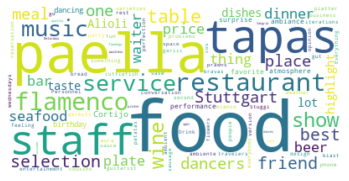

In [18]:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="white", max_words=100).generate(positive_entities_string)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## creating cloud word for positive entities

In [19]:
negative_entities_string

'No one meal Staff Food sign waiter kind restaurant card payments taxes person anything ladies midsection check food waiter waiter check rice paella bones chicken place shrimp bread personell some reviews food many flavor service restaurant times place food service sense hygenically recommendations Waiter Spain.Food cook place surprise place food beers chicken chicken dish place surprise matter card boquerones people background music shows table each other group people lot waitress word struggle door bill table seconds talk room nothing tables Rosé salad dishes show food service service house tourist paella thing Debit reservation show reservation phone confirmation service dinner surprise flamenco show birthday celebration meals restaurant show friend waitress birthday celebration meal stage treatment words idea reservation birthday celebration waitresses performance trip party reservations restaurant location reviews cave paella service way restaurant food waiter things Fish soup lum

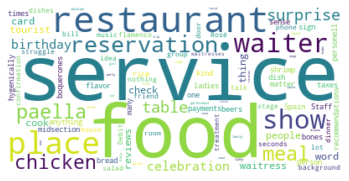

In [20]:
wordcloud = WordCloud(stopwords=stopwords,background_color="white", max_words=100).generate(negative_entities_string)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Get a clear sense of the number of occurance of entities within positive and negative reviews 

In [21]:
# Get the most common entities in Positive and negative reviews
counts_negative = Counter(negative_entities)
counts_negative_common=counts_negative.most_common(10)
counts_positive = Counter(positive_entities)
counts_positive_common =counts_positive.most_common(10)

Text(0, 0.5, '# Occurance')

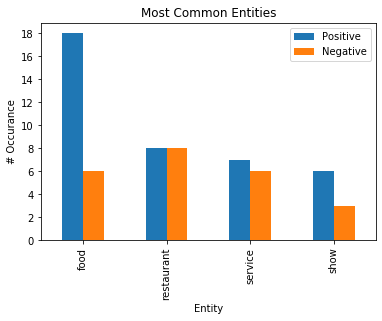

In [22]:
dst1 = dict(counts_positive_common)
dst2 = dict(counts_negative_common)
dst3 = dict()
for i in dst1:
    if i in dst2:
        dst3[i] = (dst1[i],dst2[i])

df = pd.DataFrame(dst3).T

df.columns = ['Positive', 'Negative']
# plot grouped bar chart
ax = df.plot(kind="bar",title='Most Common Entities')

ax.set_xlabel("Entity")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel("# Occurance")

In [ ]:
df.drop(['vader_value','vader_output','NLPAPI_value','NLPAPI_magnitude','NLPAPI_output'],axis=1, inplace=True)